<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


In this lab, I will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 184.4 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 134.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 157.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 144.4 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-10-15 20:56:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.7MB/s    in 2.7s    

2025-10-15 20:56:28 (55.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



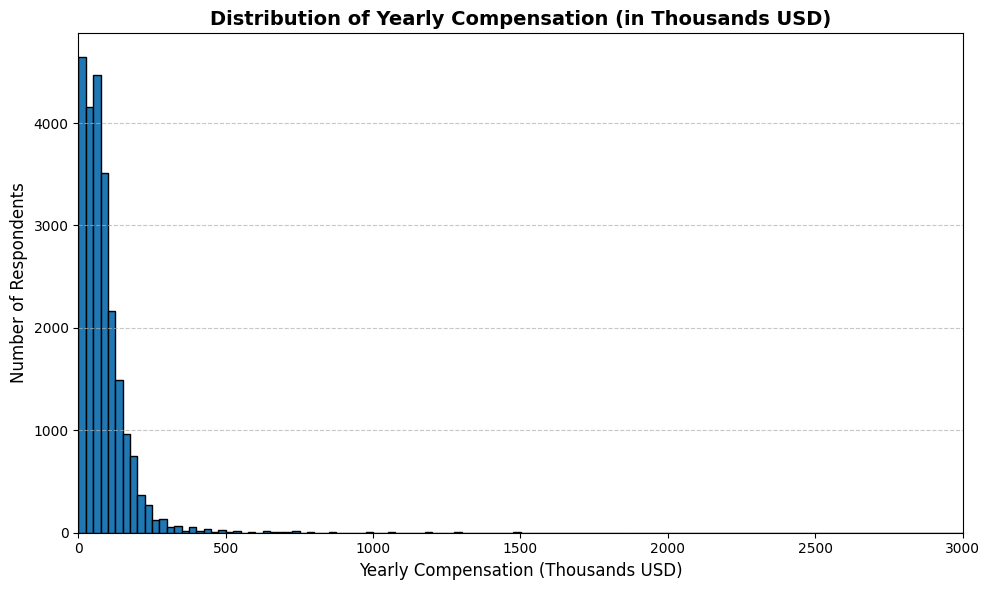

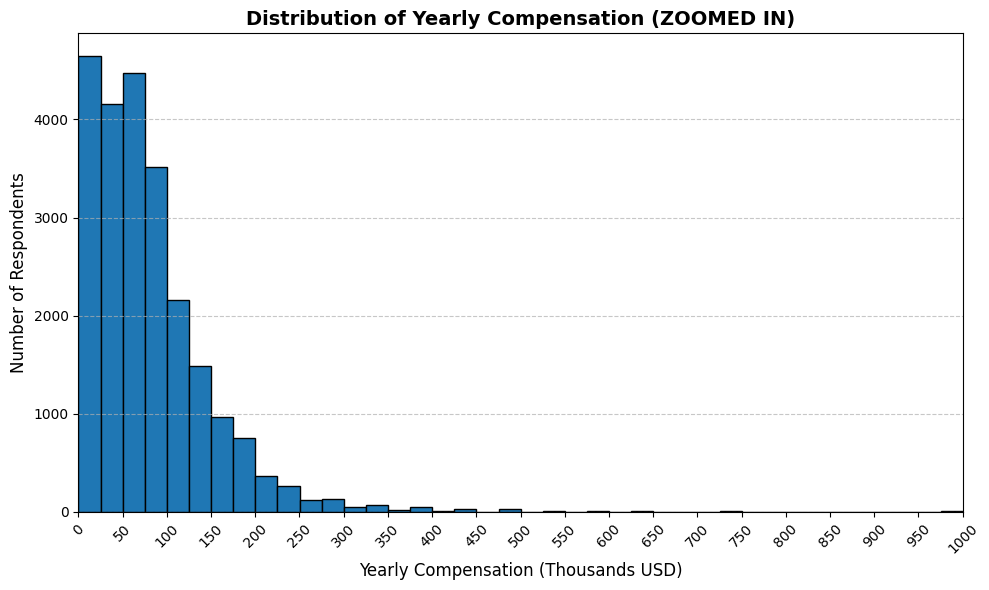

In [17]:
#Overall distribution up to $3M in yearly compensation.

# Drop missing values for compensation
df_comp = df.dropna(subset=['ConvertedCompYearly'])

# Scale compensation to thousands
comp_in_k = df_comp['ConvertedCompYearly'] / 1000

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(comp_in_k, bins=650, color='#1f77b4', edgecolor='black')
plt.title("Distribution of Yearly Compensation (in Thousands USD)", fontsize=14, weight='bold')
plt.xlabel("Yearly Compensation (Thousands USD)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xlim(0, 3000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histogram limiting compensation values to $1M USD to better visualize the distribution. 

# Drop missing values for compensation
df_comp = df.dropna(subset=['ConvertedCompYearly'])

# Scale compensation to thousands
comp_in_k = df_comp['ConvertedCompYearly'] / 1000

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(comp_in_k, bins=650, color='#1f77b4', edgecolor='black')
plt.title("Distribution of Yearly Compensation (ZOOMED IN)", fontsize=14, weight='bold')
plt.xlabel("Yearly Compensation (Thousands USD)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xlim(0, 1000)

# Set x-axis ticks every 50k and rotate 45 degrees
plt.xticks(range(0, 1001, 50), rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



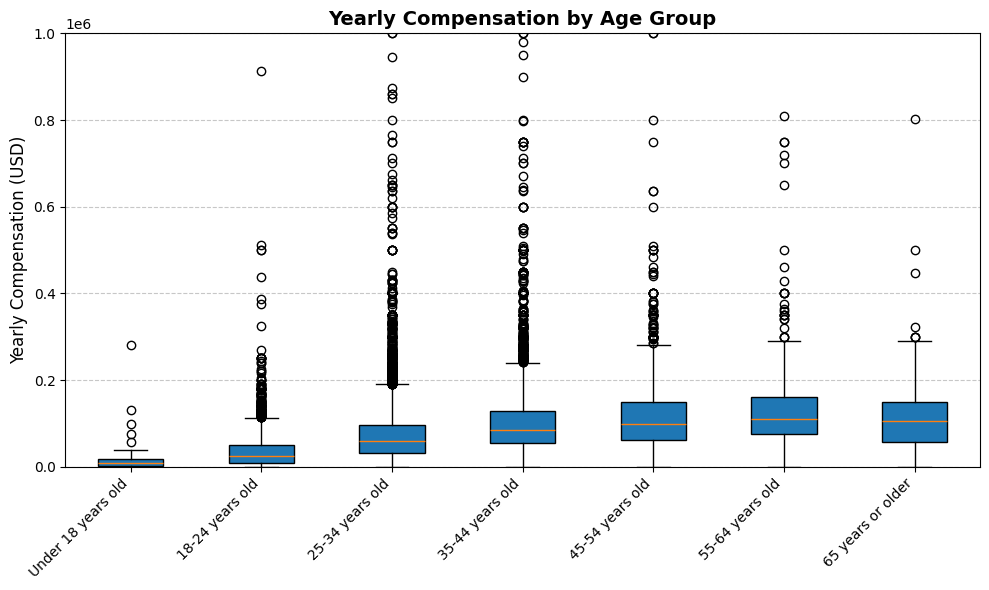

In [21]:
# Define mapping from categorical age to numeric midpoint
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}

# Drop missing values for Age and Compensation and make a copy
df_box = df.dropna(subset=['Age', 'ConvertedCompYearly']).copy()

# Map Age to numeric
df_box.loc[:, 'Age_numeric'] = df_box['Age'].map(age_mapping)

# Order age categories
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# Prepare data for boxplot
data_to_plot = [df_box[df_box['Age'] == age]['ConvertedCompYearly'] for age in age_order]

# Plot box plot
plt.figure(figsize=(10,6))
plt.boxplot(data_to_plot, patch_artist=True, boxprops=dict(facecolor='#1f77b4'))
plt.xticks(ticks=range(1, len(age_order)+1), labels=age_order, rotation=45, ha='right')
plt.title("Yearly Compensation by Age Group", fontsize=14, weight='bold')
plt.ylabel("Yearly Compensation (USD)", fontsize=12)
plt.ylim(0, 1_000_000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



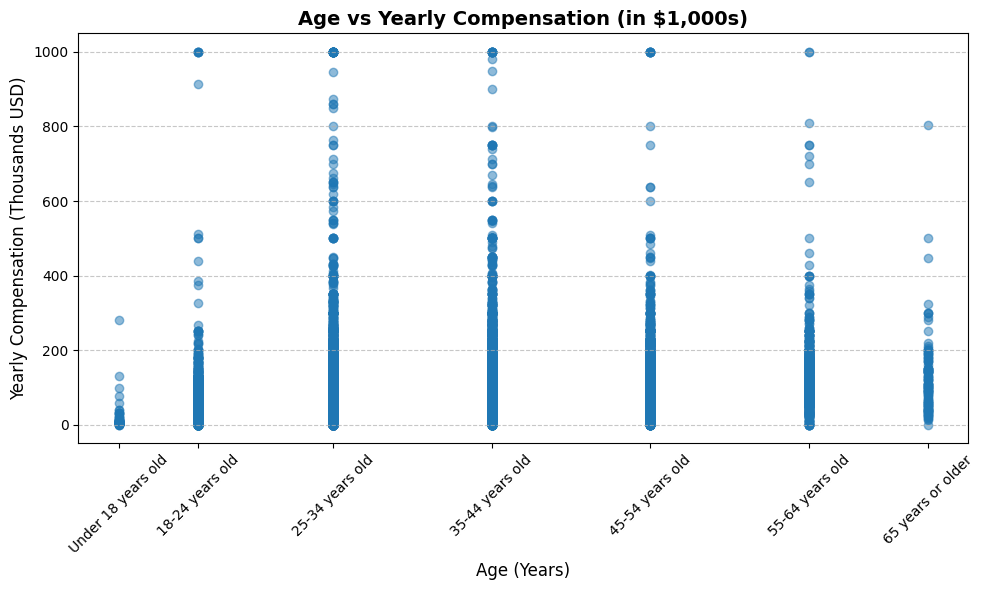

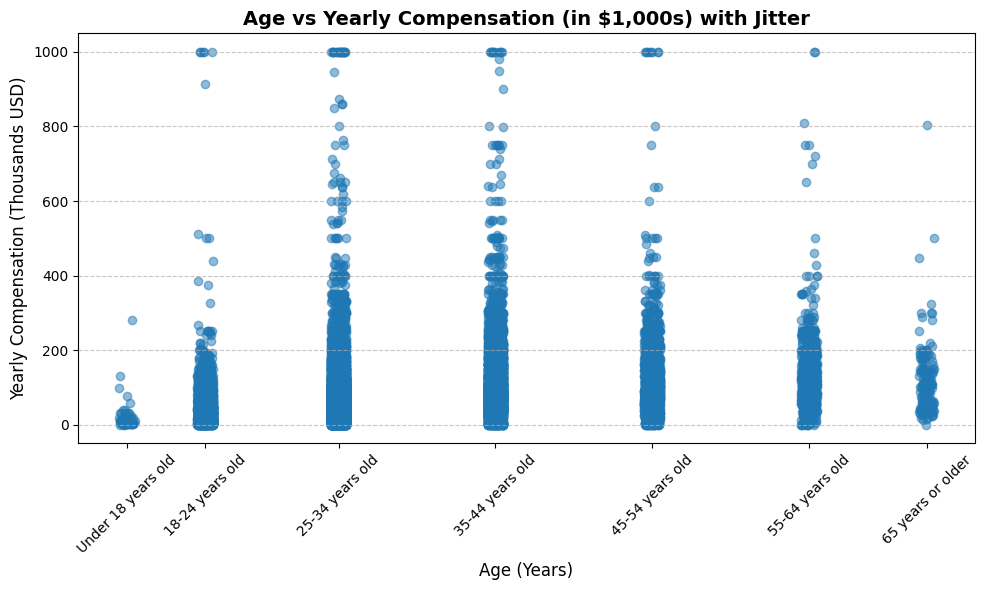

In [24]:
# Drop missing values and create a copy
df_scatter = df.dropna(subset=['Age', 'ConvertedCompYearly']).copy()

# Map categorical Age to numeric
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}
df_scatter.loc[:, 'Age_numeric'] = df_scatter['Age'].map(age_mapping)

# Scale compensation to thousands and cap at 1000 (i.e., $1M)
df_scatter.loc[:, 'Comp_k'] = (df_scatter['ConvertedCompYearly'] / 1_000).clip(upper=1000)

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_scatter['Age_numeric'], df_scatter['Comp_k'], alpha=0.5, color='#1f77b4')

plt.title("Age vs Yearly Compensation (in $1,000s)", fontsize=14, weight='bold')
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Yearly Compensation (Thousands USD)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks to match the age groups
plt.xticks(
    list(age_mapping.values()),
    list(age_mapping.keys()),
    rotation=45
)

plt.tight_layout()
plt.show()

#--------------------------------------------
import numpy as np

# Add jitter to Age_numeric
jitter_strength = 0.5  # adjust for more/less spread
df_scatter.loc[:, 'Age_jitter'] = df_scatter['Age_numeric'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df_scatter))

# Scatter plot with jitter
plt.figure(figsize=(10,6))
plt.scatter(df_scatter['Age_jitter'], df_scatter['Comp_k'], alpha=0.5, color='#1f77b4')

plt.title("Age vs Yearly Compensation (in $1,000s) with Jitter", fontsize=14, weight='bold')
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Yearly Compensation (Thousands USD)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(
    list(age_mapping.values()),
    list(age_mapping.keys()),
    rotation=45
)

plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


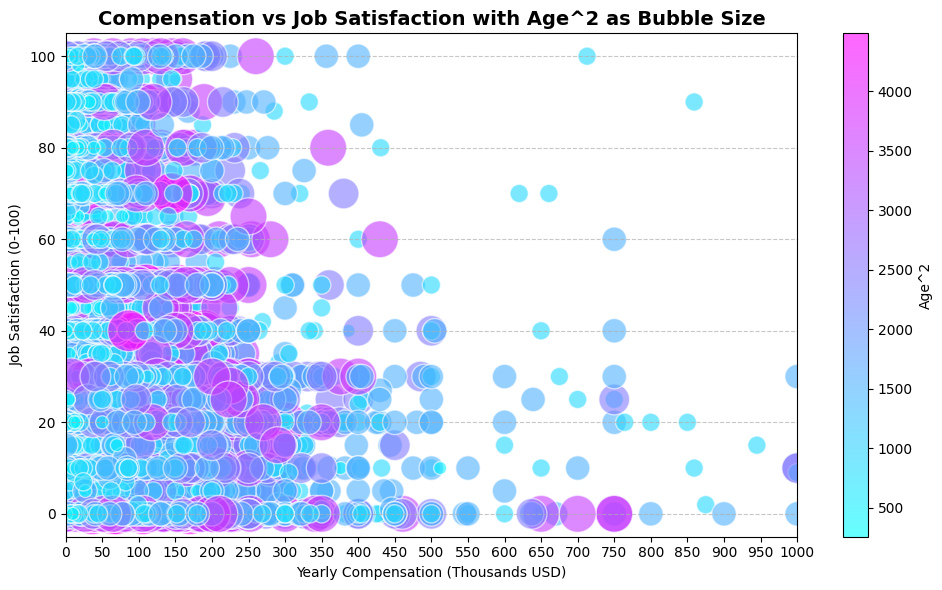

/tmp/ipykernel_299/3972030210.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df_bubble2.groupby(['Comp_bin', 'JobSat_bin'], as_index=False)['Age_numeric'].mean()


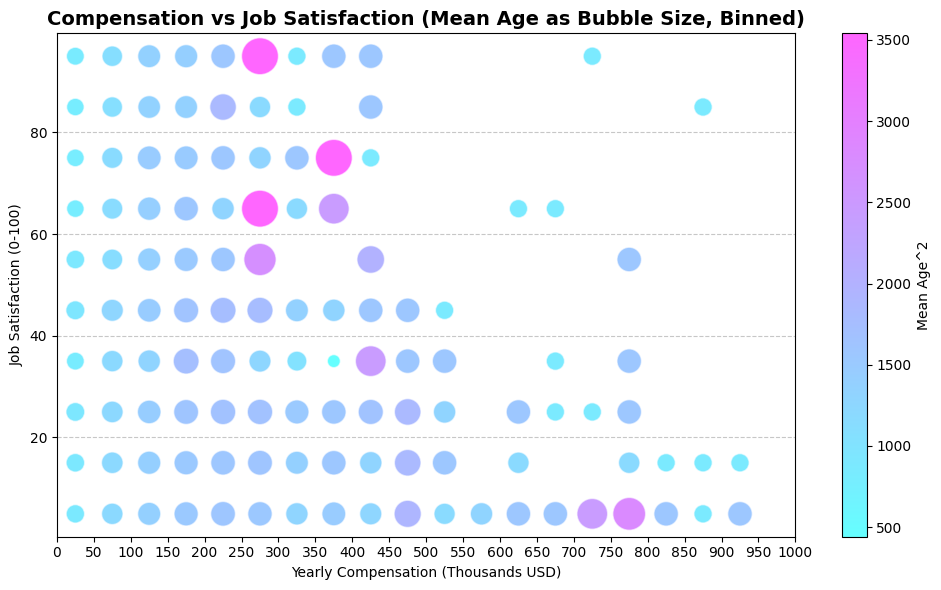

In [35]:
# Map categorical Age to numeric
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}

# ----------------- Plot 1: Bubble plot using individual ages -----------------
df_bubble1 = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age']).copy()
df_bubble1['Age_numeric'] = df_bubble1['Age'].map(age_mapping)
df_bubble1['Comp_k'] = df_bubble1['ConvertedCompYearly'] / 1000  # compensation in thousands

# Bubble size proportional to age^2
bubble_sizes1 = 0.2 * df_bubble1['Age_numeric']**2

plt.figure(figsize=(10,6))
scatter1 = plt.scatter(
    df_bubble1['Comp_k'],
    df_bubble1['JobSatPoints_6'],
    s=bubble_sizes1,
    c=df_bubble1['Age_numeric']**2,
    cmap='cool',
    alpha=0.6,
    edgecolors='w'
)
plt.title("Compensation vs Job Satisfaction with Age^2 as Bubble Size", fontsize=14, weight='bold')
plt.xlabel("Yearly Compensation (Thousands USD)")
plt.ylabel("Job Satisfaction (0-100)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 1000)
plt.xticks(range(0, 1001, 50))
plt.colorbar(scatter1, label="Age^2")
plt.tight_layout()
plt.show()

# ----------------- Plot 2: Bubble plot using mean age per bins -----------------
df_bubble2 = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age']).copy()
df_bubble2['Age_numeric'] = df_bubble2['Age'].map(age_mapping)
df_bubble2['Comp_k'] = df_bubble2['ConvertedCompYearly'] / 1000

# Bin Job Satisfaction into 10 bins
df_bubble2['JobSat_bin'] = pd.cut(df_bubble2['JobSatPoints_6'], bins=10)

# Bin Compensation into 50k intervals
comp_bins = range(0, 1050, 50)
df_bubble2['Comp_bin'] = pd.cut(df_bubble2['Comp_k'], bins=comp_bins, right=False)

# Aggregate mean age for each combination of bins
df_agg = df_bubble2.groupby(['Comp_bin', 'JobSat_bin'], as_index=False)['Age_numeric'].mean()

# Bubble size proportional to mean age^2
bubble_sizes2 = 0.2 * df_agg['Age_numeric']**2

# Use bin midpoints for plotting
df_agg['Comp_mid'] = df_agg['Comp_bin'].apply(lambda x: x.left + (x.right - x.left)/2)
df_agg['JobSat_mid'] = df_agg['JobSat_bin'].apply(lambda x: x.left + (x.right - x.left)/2)

plt.figure(figsize=(10,6))
scatter2 = plt.scatter(
    df_agg['Comp_mid'],
    df_agg['JobSat_mid'],
    s=bubble_sizes2,
    c=df_agg['Age_numeric']**2,
    cmap='cool',
    alpha=0.6,
    edgecolors='w'
)
plt.title("Compensation vs Job Satisfaction (Mean Age as Bubble Size, Binned)", fontsize=14, weight='bold')
plt.xlabel("Yearly Compensation (Thousands USD)")
plt.ylabel("Job Satisfaction (0-100)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 1000)
plt.xticks(range(0, 1001, 50))
plt.colorbar(scatter2, label="Mean Age^2")
plt.tight_layout()
plt.show()



### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



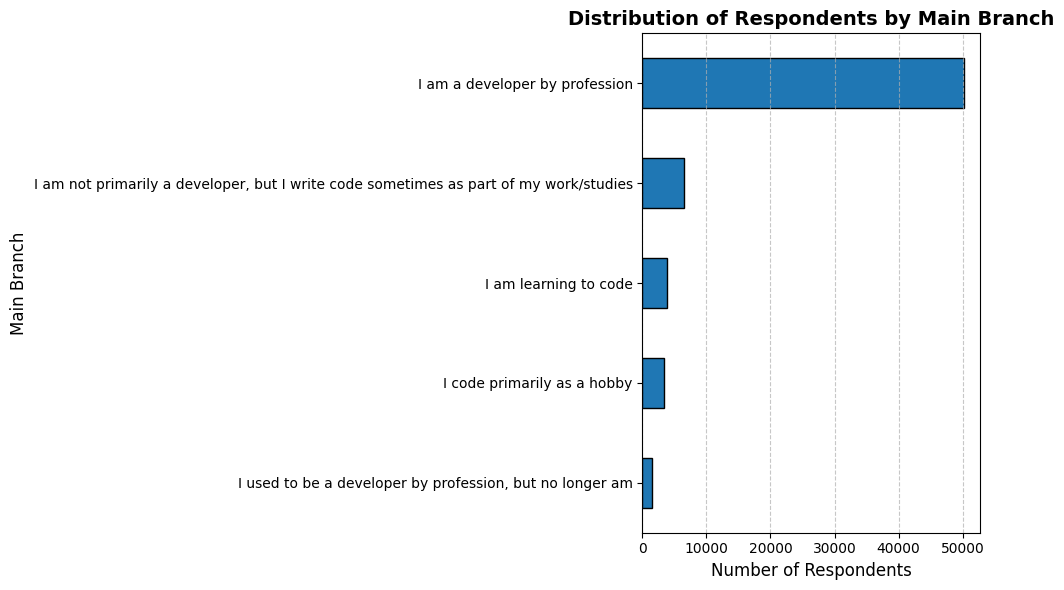

In [36]:
# Count number of respondents per MainBranch
branch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='#1f77b4', edgecolor='black')
plt.title("Distribution of Respondents by Main Branch", fontsize=14, weight='bold')
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Main Branch", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



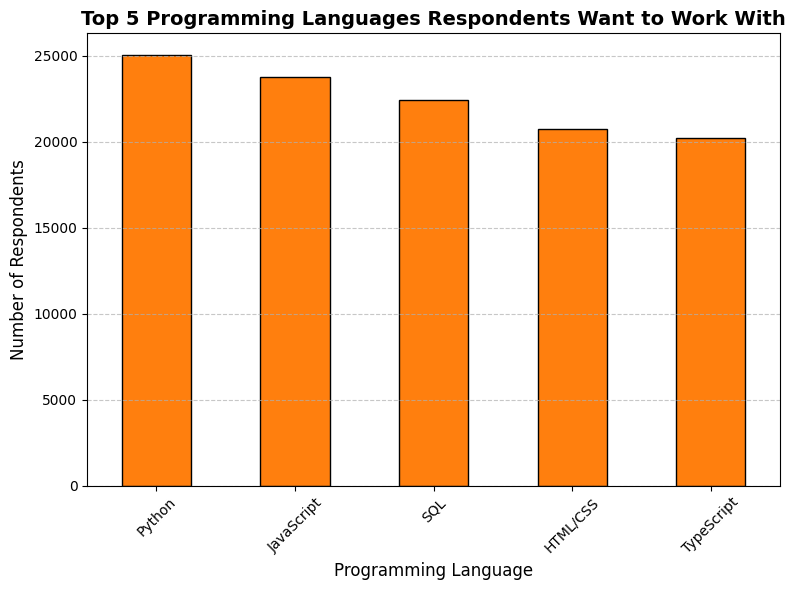

In [37]:
# Split multiple languages by ';' and explode the list
df_lang = df.dropna(subset=['LanguageWantToWorkWith']).copy()
df_lang['LanguageWantToWorkWith'] = df_lang['LanguageWantToWorkWith'].str.split(';')
df_lang = df_lang.explode('LanguageWantToWorkWith')

# Count top 5 languages
top5_langs = df_lang['LanguageWantToWorkWith'].value_counts().nlargest(5)

# Plot vertical bar chart
plt.figure(figsize=(8,6))
top5_langs.plot(kind='bar', color='#ff7f0e', edgecolor='black')
plt.title("Top 5 Programming Languages Respondents Want to Work With", fontsize=14, weight='bold')
plt.xlabel("Programming Language", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_299/197086796.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df_age_job.groupby('Age', as_index=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()


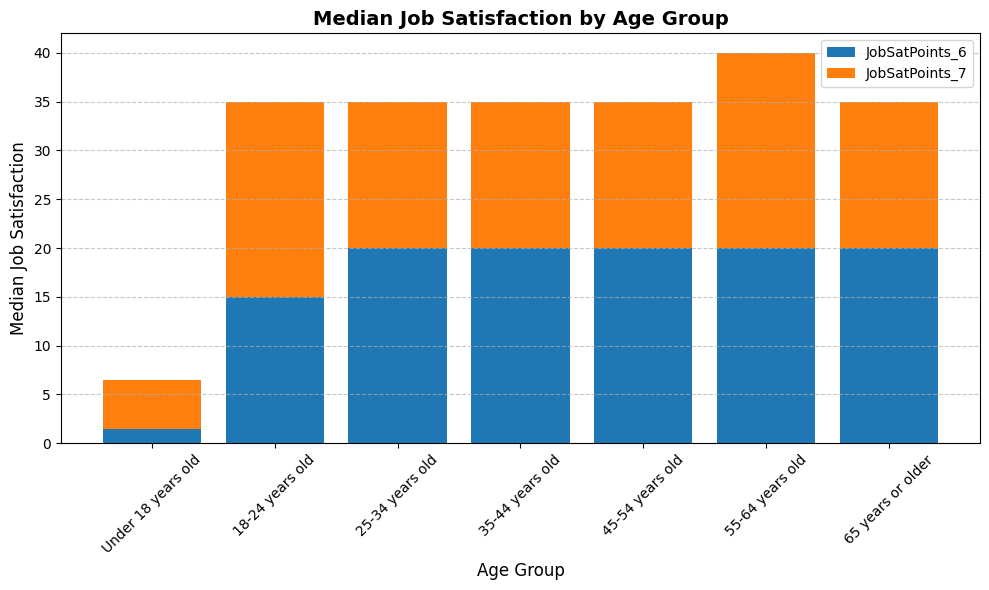

In [39]:
# Define age order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Drop missing values
df_age_job = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7']).copy()

# Ensure Age is categorical in correct order
df_age_job['Age'] = pd.Categorical(df_age_job['Age'], categories=age_order, ordered=True)

# Compute median job satisfaction
median_jobsat = df_age_job.groupby('Age', as_index=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(median_jobsat['Age'], median_jobsat['JobSatPoints_6'], label='JobSatPoints_6', color='#1f77b4')
plt.bar(median_jobsat['Age'], median_jobsat['JobSatPoints_7'], 
        bottom=median_jobsat['JobSatPoints_6'], label='JobSatPoints_7', color='#ff7f0e')

plt.title("Median Job Satisfaction by Age Group", fontsize=14, weight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Job Satisfaction", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



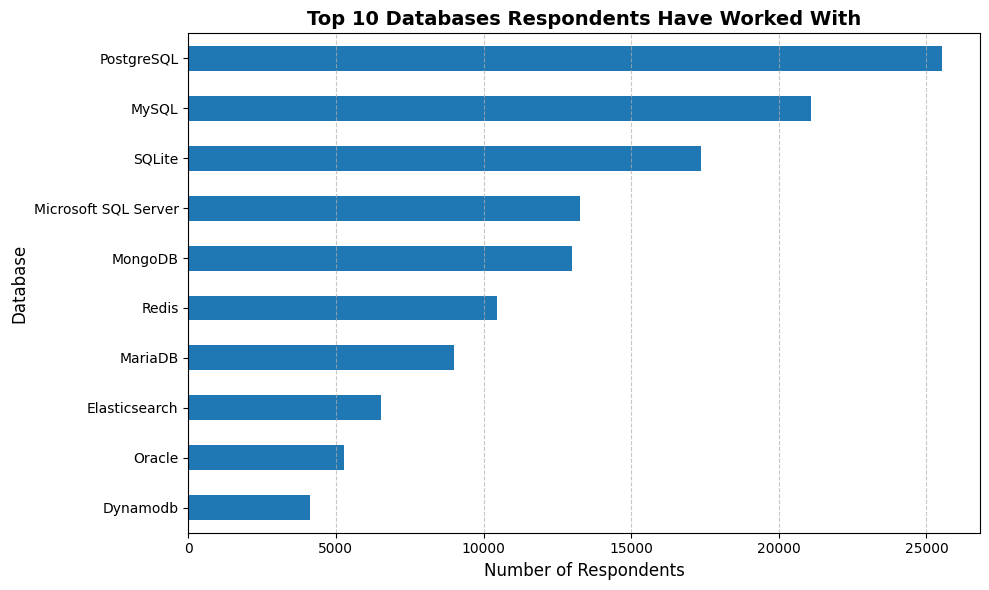

In [40]:
# Drop missing values
df_db = df.dropna(subset=['DatabaseHaveWorkedWith']).copy()

# Split the semicolon-separated values and explode into separate rows
df_db_exploded = df_db['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(drop=True)

# Count occurrences of each database
db_counts = df_db_exploded.value_counts().sort_values(ascending=False)

# Optional: keep top 10
top_dbs = db_counts.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_dbs.plot(kind='barh', color='#1f77b4')
plt.title("Top 10 Databases Respondents Have Worked With", fontsize=14, weight='bold')
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Database", fontsize=12)
plt.gca().invert_yaxis()  # Largest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



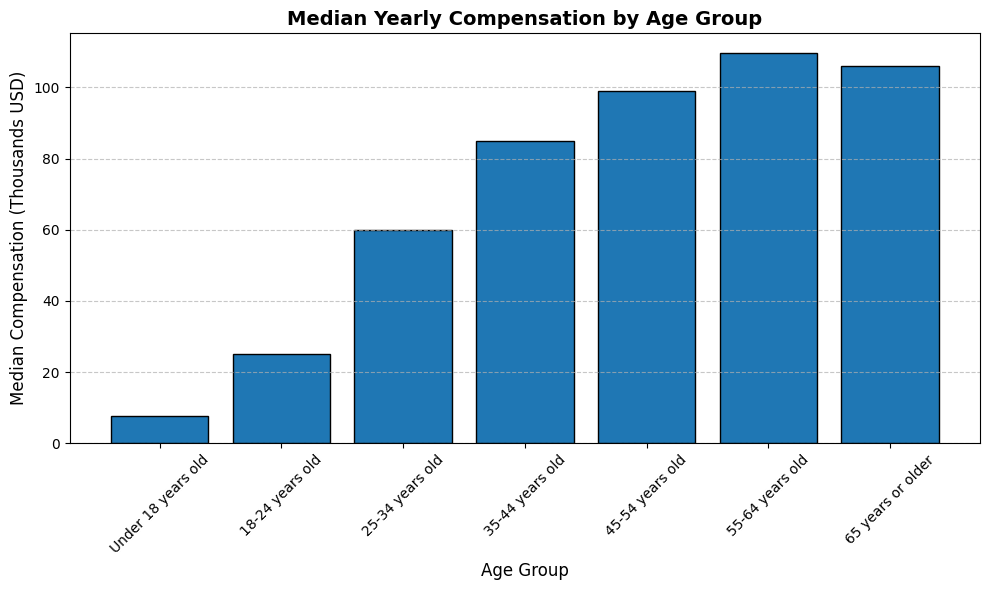

In [45]:
# Drop missing values and ensure Age is string
df_age = df.dropna(subset=['ConvertedCompYearly', 'Age']).copy()
df_age['Age'] = df_age['Age'].astype(str)

# Filter only valid age categories
df_age = df_age[df_age['Age'].isin(age_order)]

# Compute median compensation per age group
median_comp_by_age = (
    df_age.groupby('Age', as_index=False)['ConvertedCompYearly']
          .median()
)

# Convert to thousands
median_comp_by_age['Comp_k'] = median_comp_by_age['ConvertedCompYearly'] / 1000

# Ensure correct order for plotting
median_comp_by_age['Age'] = pd.Categorical(
    median_comp_by_age['Age'],
    categories=age_order,
    ordered=True
)
median_comp_by_age = median_comp_by_age.sort_values('Age')

# Plot grouped bar chart
plt.figure(figsize=(10,6))
plt.bar(
    median_comp_by_age['Age'].astype(str),
    median_comp_by_age['Comp_k'],
    color='#1f77b4',
    edgecolor='black'
)
plt.title("Median Yearly Compensation by Age Group", fontsize=14, weight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Compensation (Thousands USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



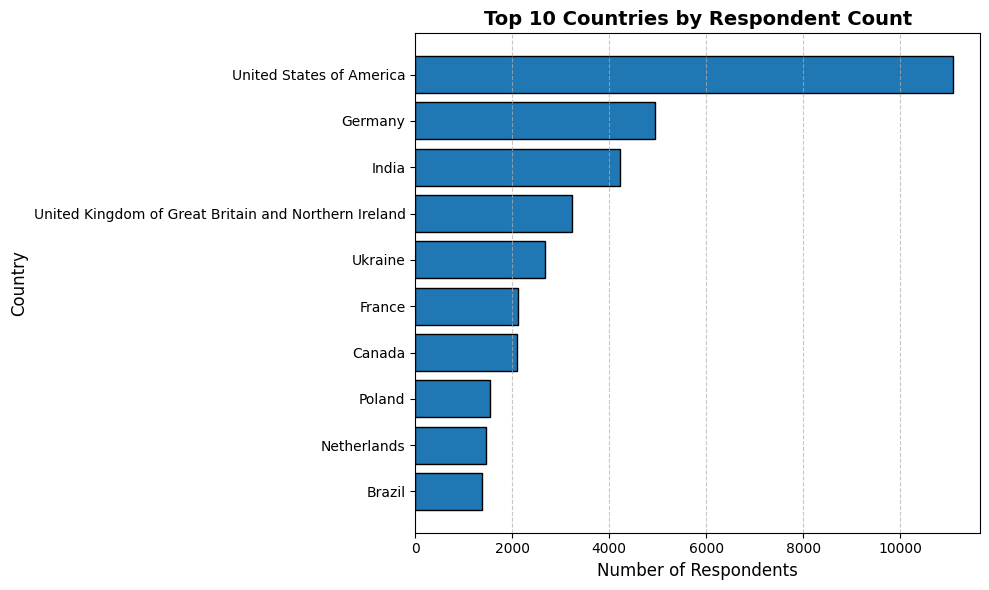

In [48]:
# Drop NaN values in Country column
df_country = df.dropna(subset=['Country'])

# Get the top 10 countries by respondent count
top_countries = df_country['Country'].value_counts().head(10)

# I chose a horizontal bar graph for better readability. 
plt.figure(figsize=(10,6))
plt.barh(top_countries.index[::-1], top_countries.values[::-1], color='#1f77b4', edgecolor='black')

plt.title("Top 10 Countries by Respondent Count", fontsize=14, weight='bold')
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout for cleaner look
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing me to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, I will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
